In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='international_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
nazioni=pkl.load(infile)
continent_nations=pkl.load(infile)
infile.close()

In [3]:
for naz in nazioni:
    print('%30s DA: %s  A:  %s  [Samples: %3d]'%(naz,
                                                   trend['date'][naz][0],
                                                   trend['date'][naz][-1],
                                                  len(np.unique(trend['date'][naz]))))
    

                   Afghanistan DA: 2020-02-24  A:  2022-06-06  [Samples: 834]
                        Africa DA: 2020-02-13  A:  2022-06-06  [Samples: 845]
                       Albania DA: 2020-02-25  A:  2022-06-06  [Samples: 833]
                       Algeria DA: 2020-02-25  A:  2022-06-06  [Samples: 833]
                       Andorra DA: 2020-03-02  A:  2022-06-06  [Samples: 827]
                        Angola DA: 2020-03-20  A:  2022-06-06  [Samples: 809]
                      Anguilla DA: 2020-03-28  A:  2022-06-06  [Samples: 801]
           Antigua and Barbuda DA: 2020-03-13  A:  2022-06-06  [Samples: 816]
                     Argentina DA: 2020-01-01  A:  2022-06-06  [Samples: 888]
                       Armenia DA: 2020-02-03  A:  2022-06-06  [Samples: 855]
                         Aruba DA: 2020-03-13  A:  2022-06-06  [Samples: 816]
                          Asia DA: 2020-01-22  A:  2022-06-06  [Samples: 867]
                     Australia DA: 2020-01-26  A:  2022-06-06  [

## Plot dati continentali

In [4]:
continente='europe'
num_nazioni=len(continent_nations[continente])

In [5]:
# per i subplot determina la griglia
grid_shape=auto_grid_shape(num_nazioni,cols=3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,48)


In [6]:
#indicatori_selected=['new_cases','total_deaths', 'new_deaths', 'total_cases_per_million',
#       'new_cases_per_million', 'total_deaths_per_million','new_deaths_per_million']

indicatori_selected=['new_cases_per_million','new_deaths_per_million']
#indicatori_selected=['total_cases_per_million','total_deaths_per_million']

last_days=60

In [7]:
for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=True,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,naz in enumerate(continent_nations[continente]):
        ax[grid_seq[i]].plot(range(len(trend['date'][naz][-last_days:])),moving_function_rev1(trend[indicatore][naz][-last_days:],np.mean,3,3),
                             'b-',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(naz+' %s: %.1f'%(trend['date'][naz][-1],trend[indicatore][naz][-1]))
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
        #ax[grid_seq[i]].set_yscale('log')
        
    #fig.savefig('PIC_%s_%s.JPG'%(continente,indicatore))

c:\Users\klaat\Anaconda3\envs\p37env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


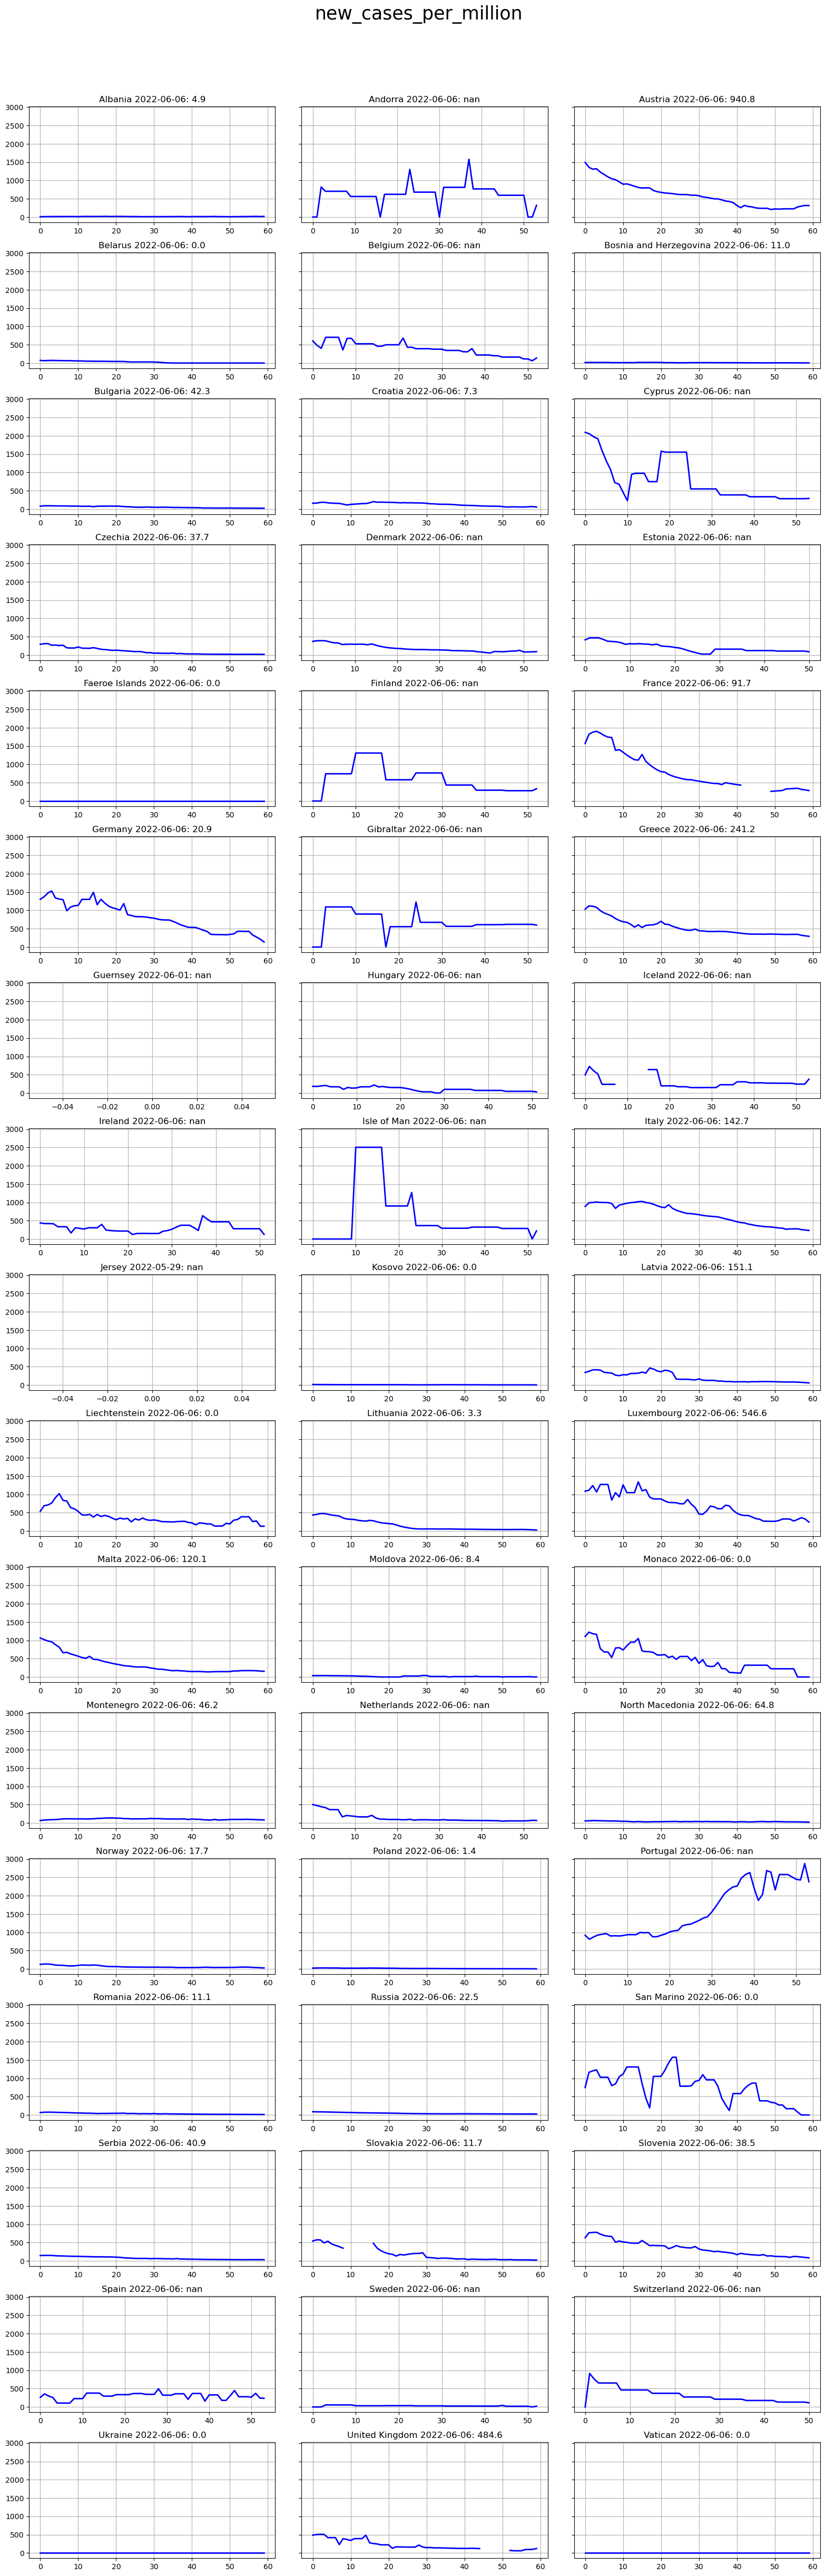

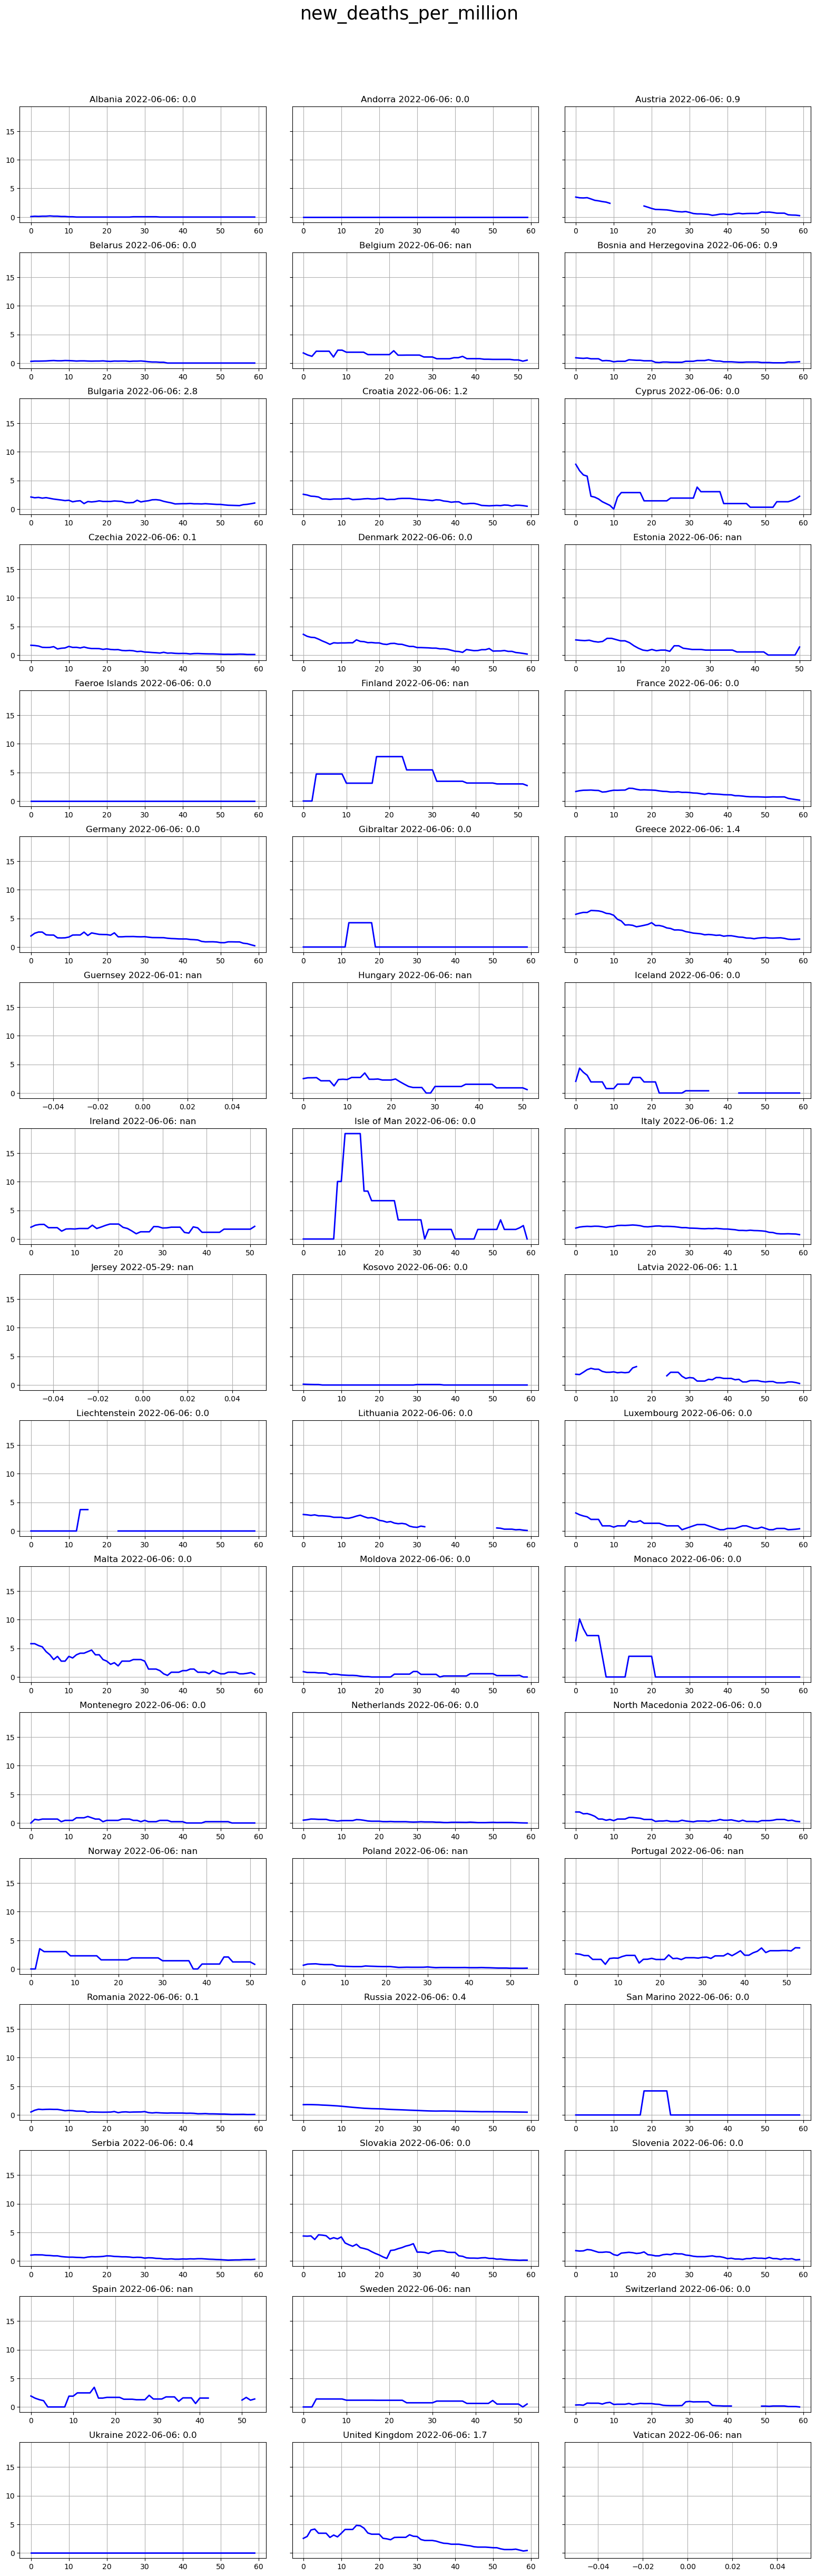

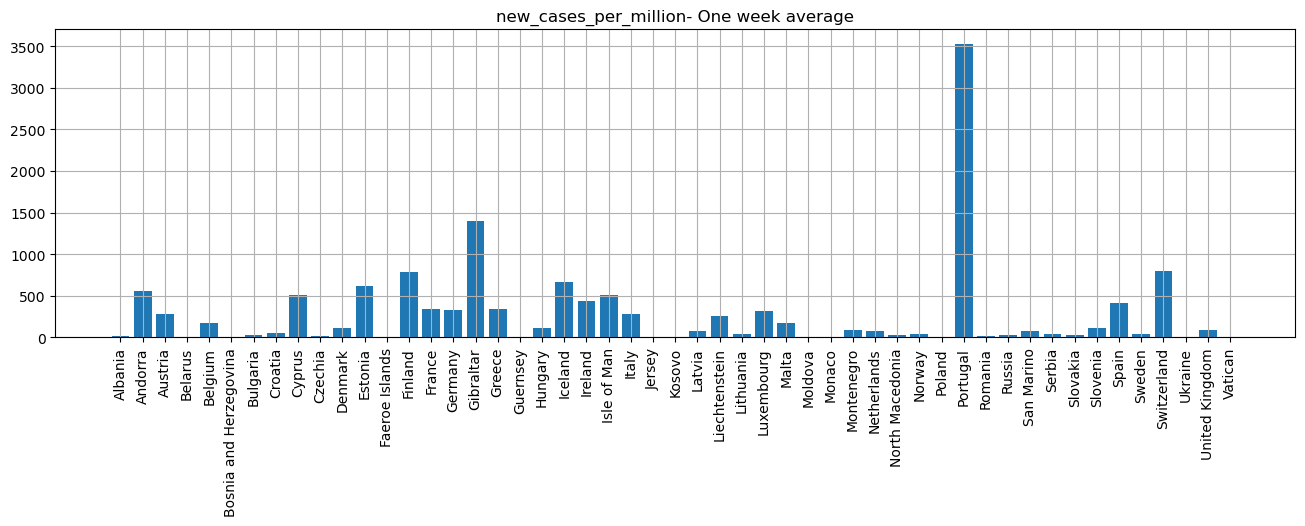

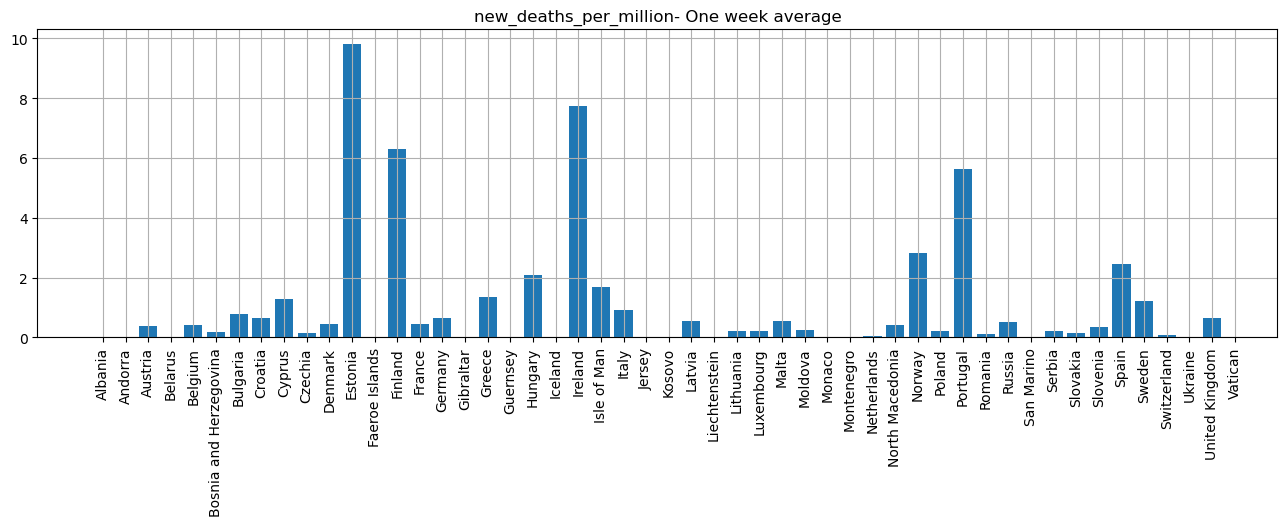

In [8]:
for indicatore in indicatori_selected:
    #valori=[trend[indicatore][naz][-1] for naz in continent_nations[continente]]
    valori=[np.nanmean(trend[indicatore][naz][-7:]) for naz in continent_nations[continente]]
    valori=np.array(valori)
    plt.figure(figsize=(16,4))
    plt.title(indicatore+'- One week average')
    plt.bar(range(len(valori)),valori)
    plt.xticks(range(len(valori)),continent_nations[continente],rotation=90)
    plt.grid()
    plt.show()

#### Versione ordinata

In [9]:
ordine=np.argsort(valori)
ordine

array([ 0, 48, 41, 33, 32, 27, 20, 16, 12, 25,  1,  3, 34, 47, 39,  9, 43,
        5, 37, 28, 29, 42, 31, 44,  2,  4, 35, 10, 14, 40, 26, 30, 15, 49,
        7,  6, 23, 46,  8, 17, 22, 19, 45, 36, 38, 13, 21, 11, 24, 18, 50],
      dtype=int64)

c:\Users\klaat\Anaconda3\envs\p37env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


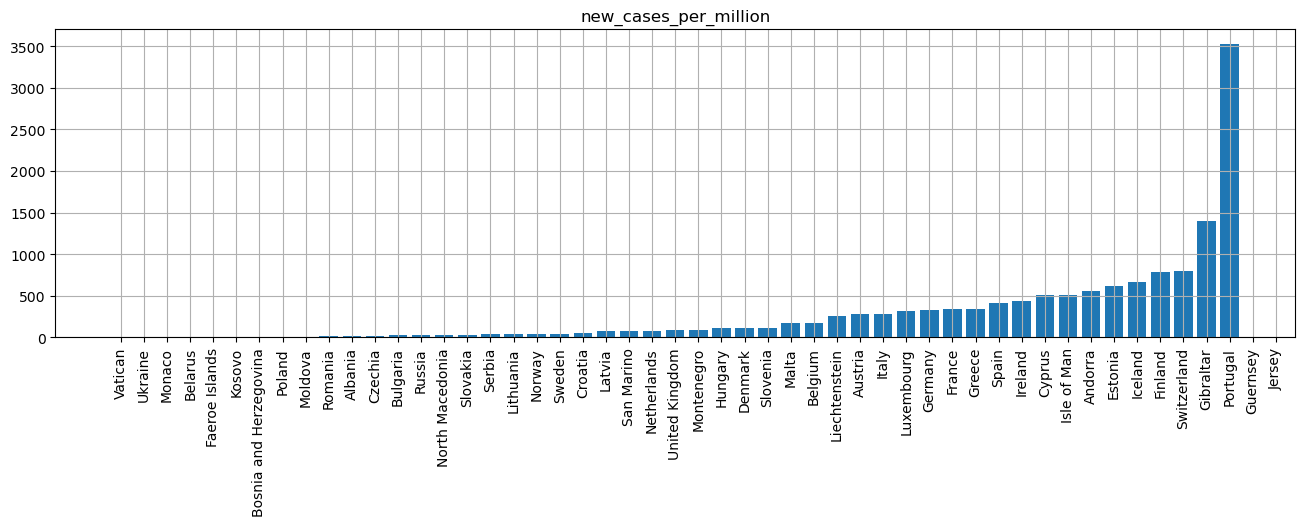

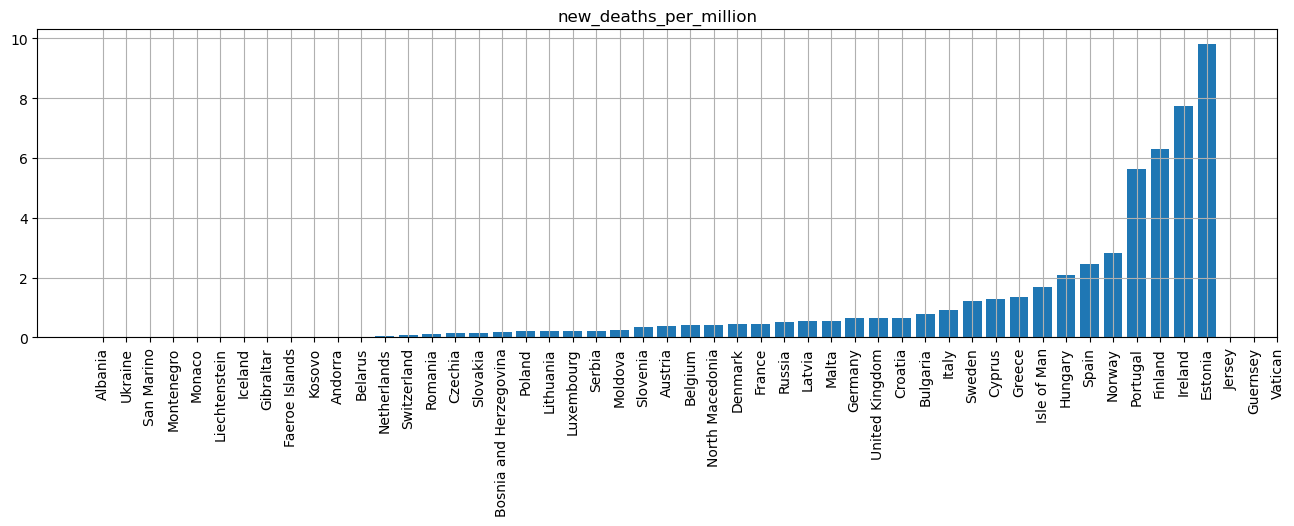

In [10]:
for indicatore in indicatori_selected:
    #valori=np.array([trend[indicatore][naz][-1] for naz in continent_nations[continente]])
    valori=[np.nanmean(trend[indicatore][naz][-7:]) for naz in continent_nations[continente]]
    valori=np.array(valori)
    ordine=np.argsort(valori)
    plt.figure(figsize=(16,4))
    plt.title(indicatore)
    plt.bar(range(len(valori)),valori[ordine])
    plt.xticks(range(len(valori)),continent_nations[continente][ordine],rotation=90)
    plt.grid()
    plt.show()

## Scatter plots comparativi

In [11]:
x_indicator='new_cases_per_million'
y_indicator='new_deaths_per_million'

days_average=7
continente='europe'

x_valori=[np.nanmean(trend[x_indicator][naz][-days_average:]) for naz in continent_nations[continente]]
y_valori=[np.nanmean(trend[y_indicator][naz][-days_average:]) for naz in continent_nations[continente]]


c:\Users\klaat\Anaconda3\envs\p37env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
c:\Users\klaat\Anaconda3\envs\p37env\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


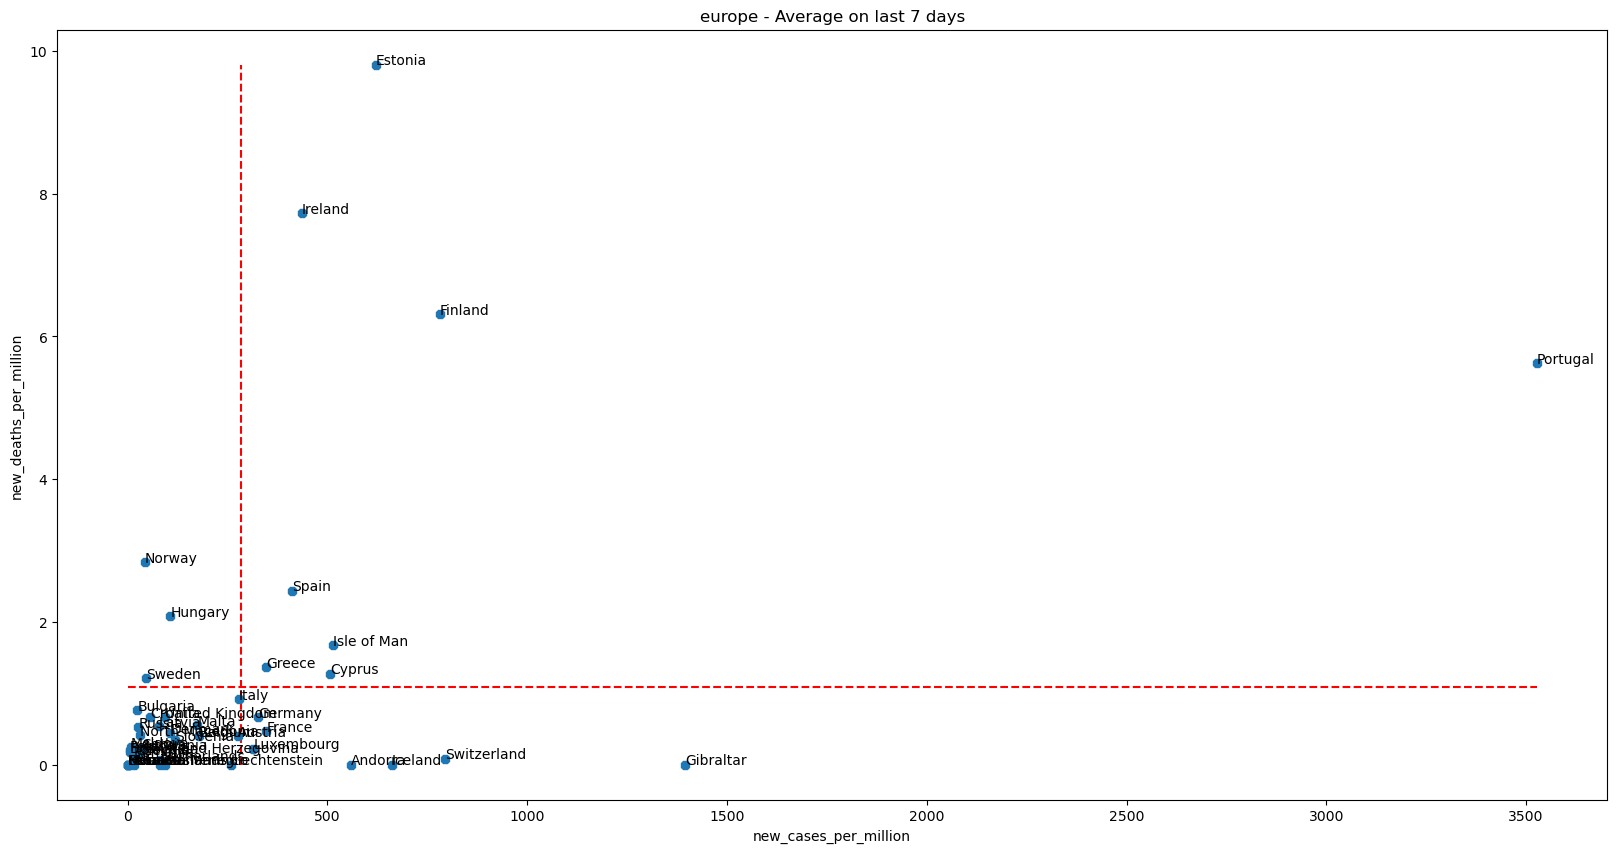

In [12]:
fig,ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(x_valori,y_valori,marker='8',linestyle='')

for i in range(len(continent_nations[continente])):
    if not(np.isnan(x_valori[i]) or np.isnan(y_valori[i])):
        ax.text((x_valori[i]),
                (y_valori[i]),
                continent_nations[continente][i])
        
ax.hlines(np.nanmean(y_valori),min(x_valori),max(x_valori),colors='r', linestyles='--')
ax.vlines(np.nanmean(x_valori),min(y_valori),max(y_valori),colors='r', linestyles='--')
ax.set_xlabel(x_indicator)
ax.set_ylabel(y_indicator)
ax.set_title('%s - Average on last %d days'%(continente,days_average))

plt.show()

In [13]:
for i,c in enumerate(continent_nations[continente]):
    print('%d %s'%(i,c))

0 Albania
1 Andorra
2 Austria
3 Belarus
4 Belgium
5 Bosnia and Herzegovina
6 Bulgaria
7 Croatia
8 Cyprus
9 Czechia
10 Denmark
11 Estonia
12 Faeroe Islands
13 Finland
14 France
15 Germany
16 Gibraltar
17 Greece
18 Guernsey
19 Hungary
20 Iceland
21 Ireland
22 Isle of Man
23 Italy
24 Jersey
25 Kosovo
26 Latvia
27 Liechtenstein
28 Lithuania
29 Luxembourg
30 Malta
31 Moldova
32 Monaco
33 Montenegro
34 Netherlands
35 North Macedonia
36 Norway
37 Poland
38 Portugal
39 Romania
40 Russia
41 San Marino
42 Serbia
43 Slovakia
44 Slovenia
45 Spain
46 Sweden
47 Switzerland
48 Ukraine
49 United Kingdom
50 Vatican
